In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train=pd.read_csv('D:/Sync\'s_Intern/Sign Language Classification/Data Set/sign_mnist_train.csv')
test=pd.read_csv('D:/Sync\'s_Intern/Sign Language Classification/Data Set/sign_mnist_test.csv')

In [3]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [4]:
labels=train['label'].values
print(labels)

[ 3  6  2 ... 18 17 23]


In [5]:
uni_val=np.array(labels)
np.unique(uni_val)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24], dtype=int64)

<AxesSubplot:ylabel='count'>

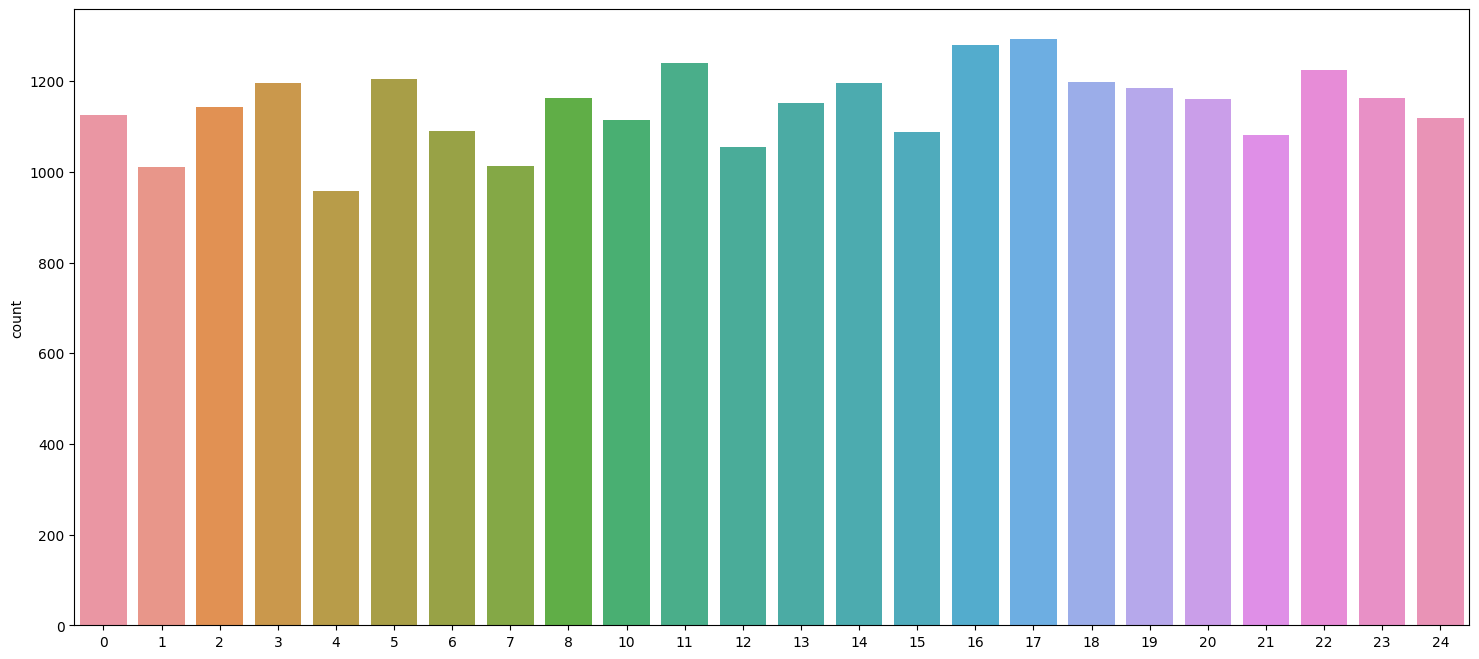

In [6]:
plt.figure(figsize=(18,8))
sns.countplot(x=labels)

In [7]:
train.drop('label',axis=1,inplace=True)

In [8]:
images=train.values
images=np.array([np.reshape(i,(28,28)) for i in images])
images=np.array([i.flatten() for i in images])


In [9]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
labels=lb.fit_transform(labels)

In [10]:
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [11]:
len(labels[0])

24

In [12]:
len(labels)

27455

[0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


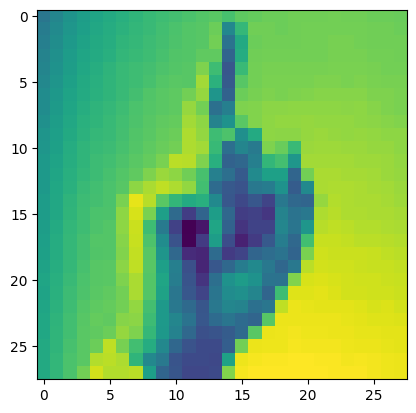

In [13]:
index=0
print(labels[index])
plt.imshow(images[index].reshape(28,28))

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


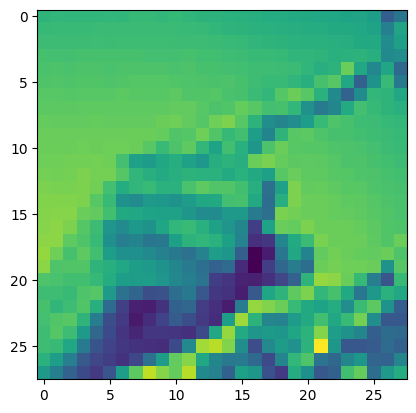

In [14]:
index=1
print(labels[index])
plt.imshow(images[index].reshape(28,28))

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


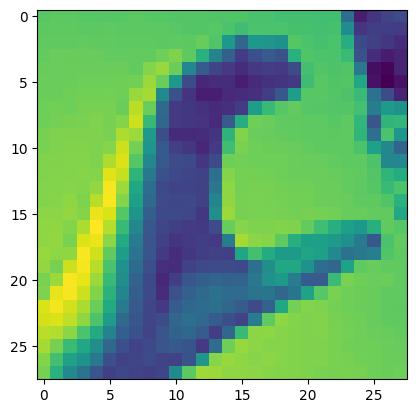

In [15]:
index=2
print(labels[index])
plt.imshow(images[index].reshape(28,28))

In [16]:
import cv2 
for i in range(0,10):
    rand=np.random.randint(0,len(images))
    input_im=images[rand]
    sample=input_im.reshape(28,28).astype(np.uint8)
    sample=cv2.resize(sample,None,fx=10,fy=10,interpolation=cv2.INTER_CUBIC)
    cv2.imshow("sample image",sample)
    cv2.waitKey(0)
cv2.destroyAllWindows()  

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(images,labels,test_size=0.3,random_state=42)

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Conv2D,MaxPooling2D,Flatten

batch_size=128
num_classes=24
Epochs=10

x_train=x_train/255
x_test=x_test/255

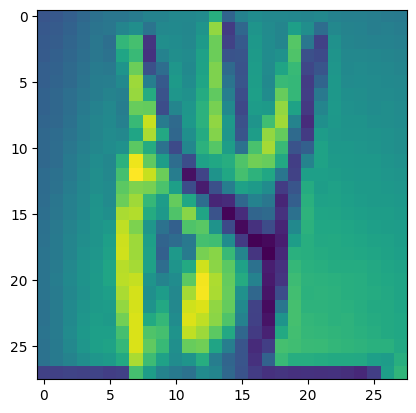

In [19]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
plt.imshow(x_train[0].reshape(28,28))

In [20]:
from tensorflow.keras import backend as k
from tensorflow.keras.optimizers import Adam

model=Sequential()
model.add(Conv2D(64,kernel_size=(3,3),activation='relu',input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes,activation='softmax'))

In [21]:
model.compile(
    loss='categorical_crossentropy',
    optimizer=Adam(),
    metrics=['accuracy']
)

In [22]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 1, 1, 64)          0

In [23]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=Epochs,batch_size=batch_size)

Epoch 1/10
151/151 [==============================] - 16s 98ms/step - loss: 2.5004 - accuracy: 0.2316 - val_loss: 1.4551 - val_accuracy: 0.5203
Epoch 2/10
151/151 [==============================] - 15s 96ms/step - loss: 1.1217 - accuracy: 0.6122 - val_loss: 0.7256 - val_accuracy: 0.7704
Epoch 3/10
151/151 [==============================] - 14s 91ms/step - loss: 0.6700 - accuracy: 0.7727 - val_loss: 0.4570 - val_accuracy: 0.8464
Epoch 4/10
151/151 [==============================] - 14s 91ms/step - loss: 0.4403 - accuracy: 0.8509 - val_loss: 0.2834 - val_accuracy: 0.9176
Epoch 5/10
151/151 [==============================] - 14s 92ms/step - loss: 0.2992 - accuracy: 0.9007 - val_loss: 0.1840 - val_accuracy: 0.9448
Epoch 6/10
151/151 [==============================] - 14s 94ms/step - loss: 0.2005 - accuracy: 0.9355 - val_loss: 0.1379 - val_accuracy: 0.9567
Epoch 7/10
151/151 [==============================] - 14s 95ms/step - loss: 0.1479 - accuracy: 0.9545 - val_loss: 0.0719 - val_accuracy:

In [24]:
model.save("sign_language_model.h5")
print("Model saved")

Model saved


c:\Users\future\Documents\python\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


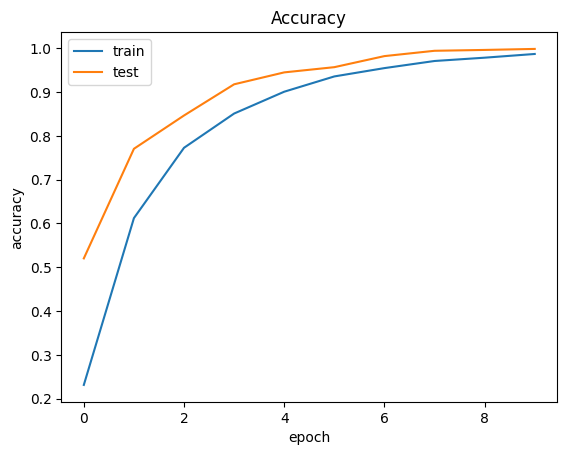

In [25]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend(['train','test'])

In [26]:
test_labels=test['label']
test.drop('label',axis=1,inplace=True)


test_images=test.values
test_images=np.array([np.reshape(i,(28,28)) for i in test_images])
test_images=np.array([i.flatten() for i in test_images])
test_labels=lb.fit_transform(test_labels)

test_images=test_images.reshape(test_images.shape[0],28,28,1)
test_images.shape

(7172, 28, 28, 1)

In [27]:
y_pred=model.predict(test_images)

225/225 [==============================] - 1s 6ms/step


In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(test_labels,y_pred.round())

0.8383993307306191

In [29]:
def get_letter(result):
    class_labels={
        0:'A',
        1:'B',
        2:'C',
        3:'D',
        4:'E',
        5:'F',
        6:'G',
        7:'H',
        8:'I',
        9:'K',
        10:'L',
        11:'M',
        12:'N',
        13:'O',
        14:'P',
        15:'Q',
        16:'R',
        17:'S',
        18:'T',
        19:'U',
        20:'V',
        21:'W',
        22:'X',
        23:'Y'
    }
    try:
        res=int(result)
        return class_labels[res]
    except:
        return "Error"

In [35]:
cap=cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open camera.")
    exit()
while True:
    ret,frame=cap.read()
    if not ret:
        print("Error: Failed to retrieve frame from the camera.")
        break
    roi=frame[100:400,320:620]
    cv2.imshow('roi',roi)
    roi=cv2.cvtColor(roi,cv2.COLOR_BGR2GRAY)
    roi=cv2.resize(roi,(28,28),interpolation=cv2.INTER_AREA)

    cv2.imshow('roi scaled and gray',roi)
    copy=frame.copy()
    cv2.rectangle(copy, (320, 100), (620, 400), (255, 0, 0), 5)

    roi=roi.reshape(1,28,28,1)

    class_probabilities = model.predict(roi)
    
    # Find the class with the highest probability
    predicted_class = np.argmax(class_probabilities)
    
    # Get the corresponding letter from your dictionary
    result = get_letter(predicted_class)
    
    cv2.putText(copy, result, (300, 100), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)
    cv2.imshow('frame',copy)

    if cv2.waitKey(1)==13:
        break
    cap.release()
    cv2.destroyAllWindows()

1/1 [==============================] - 0s 118ms/step
Error: Failed to retrieve frame from the camera.
